In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
with open("lieux-2022.csv", "r") as csv_file:
    headers = "".join([line.strip() for line in csv_file.readlines()[:2]]).split(";")

In [4]:
lieu_df = pd.read_csv("lieux-2022.csv", delimiter=";")
lieu_df.head()

/tmp/ipykernel_236145/566372591.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  lieu_df = pd.read_csv("lieux-2022.csv", delimiter=";")


,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,202200000001,4,TEIL(vieille route du),0,NaN,2,2,0,1,(1),(1),1,NaN,-1,1,0,1,50
1,202200000002,4,NaN,0,NaN,2,2,0,1,(1),(1),1,NaN,-1,1,0,1,50
2,202200000003,3,ROND POINT DE BREZILLET,0,NaN,-1,2,0,1,0,0,1,NaN,-1,1,5,1,50
3,202200000004,4,QUATORZE JUILLET (RUE DU),0,NaN,1,1,0,2,(1),(1),1,NaN,4,1,0,1,30
4,202200000005,3,ROUTE DE JEAN MOULIN-RN 538,0,NaN,2,2,0,1,8,0,1,NaN,-1,1,0,1,80


In [5]:
carac_df = pd.read_csv("carcteristiques-2022.csv", delimiter=";", decimal=",")
carac_df.head()

,Accident_Id,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202200000001,19,10,2022,16:15,1,26,26198,2,3,1,3,TEIL(vieille route du),44.559420,4.725720
1,202200000002,20,10,2022,08:34,1,25,25204,2,3,1,3,Miranda,46.925810,6.346200
2,202200000003,20,10,2022,17:15,1,22,22360,2,6,1,2,ROND POINT DE BREZILLET,48.493162,-2.760439
3,202200000004,20,10,2022,18:00,1,16,16102,2,3,8,6,LOHMEYER (RUE),45.692652,-0.326290
4,202200000005,19,10,2022,11:45,1,13,13103,1,1,1,2,ROUTE DE JEAN MOULIN-RN 538,43.675579,5.092703


In [6]:
carac_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55302 entries, 0 to 55301
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Accident_Id  55302 non-null  int64  
 1   jour         55302 non-null  int64  
 2   mois         55302 non-null  int64  
 3   an           55302 non-null  int64  
 4   hrmn         55302 non-null  object 
 5   lum          55302 non-null  int64  
 6   dep          55302 non-null  object 
 7   com          55302 non-null  object 
 8   agg          55302 non-null  int64  
 9   int          55302 non-null  int64  
 10  atm          55302 non-null  int64  
 11  col          55302 non-null  int64  
 12  adr          54069 non-null  object 
 13  lat          55302 non-null  float64
 14  long         55302 non-null  float64
dtypes: float64(2), int64(9), object(4)
memory usage: 6.3+ MB


In [7]:
DEPARTMENTS = {
    '01': 'Ain', 
    '02': 'Aisne', 
    '03': 'Allier', 
    '04': 'Alpes-de-Haute-Provence', 
    '05': 'Hautes-Alpes',
    '06': 'Alpes-Maritimes', 
    '07': 'Ardèche', 
    '08': 'Ardennes', 
    '09': 'Ariège', 
    '10': 'Aube', 
    '11': 'Aude',
    '12': 'Aveyron', 
    '13': 'Bouches-du-Rhône', 
    '14': 'Calvados', 
    '15': 'Cantal', 
    '16': 'Charente',
    '17': 'Charente-Maritime', 
    '18': 'Cher', 
    '19': 'Corrèze', 
    '2A': 'Corse-du-Sud', 
    '2B': 'Haute-Corse',
    '21': 'Côte-d\'Or', 
    '22': 'Côtes-d\'Armor', 
    '23': 'Creuse', 
    '24': 'Dordogne', 
    '25': 'Doubs', 
    '26': 'Drôme',
    '27': 'Eure', 
    '28': 'Eure-et-Loir', 
    '29': 'Finistère', 
    '30': 'Gard', 
    '31': 'Haute-Garonne', 
    '32': 'Gers',
    '33': 'Gironde', 
    '34': 'Hérault', 
    '35': 'Ille-et-Vilaine', 
    '36': 'Indre', 
    '37': 'Indre-et-Loire',
    '38': 'Isère', 
    '39': 'Jura', 
    '40': 'Landes', 
    '41': 'Loir-et-Cher', 
    '42': 'Loire', 
    '43': 'Haute-Loire',
    '44': 'Loire-Atlantique', 
    '45': 'Loiret', 
    '46': 'Lot', 
    '47': 'Lot-et-Garonne', 
    '48': 'Lozère',
    '49': 'Maine-et-Loire', 
    '50': 'Manche', 
    '51': 'Marne', 
    '52': 'Haute-Marne', 
    '53': 'Mayenne',
    '54': 'Meurthe-et-Moselle', 
    '55': 'Meuse', 
    '56': 'Morbihan', 
    '57': 'Moselle', 
    '58': 'Nièvre', 
    '59': 'Nord',
    '60': 'Oise', 
    '61': 'Orne', 
    '62': 'Pas-de-Calais', 
    '63': 'Puy-de-Dôme', 
    '64': 'Pyrénées-Atlantiques',
    '65': 'Hautes-Pyrénées', 
    '66': 'Pyrénées-Orientales', 
    '67': 'Bas-Rhin', 
    '68': 'Haut-Rhin', 
    '69': 'Rhône',
    '70': 'Haute-Saône', 
    '71': 'Saône-et-Loire', 
    '72': 'Sarthe', 
    '73': 'Savoie', 
    '74': 'Haute-Savoie',
    '75': 'Paris', 
    '76': 'Seine-Maritime', 
    '77': 'Seine-et-Marne', 
    '78': 'Yvelines', 
    '79': 'Deux-Sèvres',
    '80': 'Somme', 
    '81': 'Tarn', 
    '82': 'Tarn-et-Garonne', 
    '83': 'Var', 
    '84': 'Vaucluse', 
    '85': 'Vendée',
    '86': 'Vienne', 
    '87': 'Haute-Vienne', 
    '88': 'Vosges', 
    '89': 'Yonne', 
    '90': 'Territoire de Belfort',
    '91': 'Essonne', 
    '92': 'Hauts-de-Seine', 
    '93': 'Seine-Saint-Denis', 
    '94': 'Val-de-Marne', 
    '95': 'Val-d\'Oise',
    '971': 'Guadeloupe', 
    '972': 'Martinique', 
    '973': 'Guyane', 
    '974': 'La Réunion', 
    '976': 'Mayotte',
}

In [8]:
REGIONS2 = {
    '01': 'Auvergne-Rhône-Alpes',
    '03': 'Auvergne-Rhône-Alpes',
    '07': 'Auvergne-Rhône-Alpes',
    '15': 'Auvergne-Rhône-Alpes',
    '26': 'Auvergne-Rhône-Alpes',
    '38': 'Auvergne-Rhône-Alpes',
    '42': 'Auvergne-Rhône-Alpes',
    '43': 'Auvergne-Rhône-Alpes',
    '63': 'Auvergne-Rhône-Alpes',
    '69': 'Auvergne-Rhône-Alpes',
    '73': 'Auvergne-Rhône-Alpes',
    '74': 'Auvergne-Rhône-Alpes',

    '21': 'Bourgogne-Franche-Comté',
    '25': 'Bourgogne-Franche-Comté',
    '39': 'Bourgogne-Franche-Comté',
    '58': 'Bourgogne-Franche-Comté',
    '70': 'Bourgogne-Franche-Comté',
    '71': 'Bourgogne-Franche-Comté',
    '89': 'Bourgogne-Franche-Comté',
    '90': 'Bourgogne-Franche-Comté',

    '35':'Bretagne', 
    '22':'Bretagne',
    '56':'Bretagne',
    '29':'Bretagne',
  
    '18': 'Centre-Val de Loire',
    '28': 'Centre-Val de Loire',
    '36': 'Centre-Val de Loire',
    '37': 'Centre-Val de Loire',
    '41': 'Centre-Val de Loire',
    '45': 'Centre-Val de Loire',

    '2A':'Corse', 
    '2B':'Corse',

    '08':'Grand Est',
    '10':'Grand Est',
    '51':'Grand Est',
    '52':'Grand Est',
    '54':'Grand Est',
    '55':'Grand Est',
    '57':'Grand Est',
    '67':'Grand Est',
    '68':'Grand Est',
    '88':'Grand Est',

    '971':'Guadeloupe',
    '973':'Guyane',

    '02': 'Hauts-de-France',
    '59': 'Hauts-de-France',
    '60': 'Hauts-de-France', 
    '62': 'Hauts-de-France',
    '80': 'Hauts-de-France',

    '75':'Île-de-France',
    '77':'Île-de-France',
    '78':'Île-de-France', 
    '91':'Île-de-France',
    '92':'Île-de-France',
    '93':'Île-de-France',
    '94':'Île-de-France',
    '95':'Île-de-France',

    '974':'La Réunion',
    '972':'Martinique',

    '14':'Normandie',
    '27':'Normandie',
    '50':'Normandie',
    '61':'Normandie',
    '76':'Normandie',
  

    '16':'Nouvelle-Aquitaine',
    '17':'Nouvelle-Aquitaine',
    '19':'Nouvelle-Aquitaine',
    '23':'Nouvelle-Aquitaine',
    '24':'Nouvelle-Aquitaine',
    '33':'Nouvelle-Aquitaine',
    '40':'Nouvelle-Aquitaine',
    '47':'Nouvelle-Aquitaine',
    '64':'Nouvelle-Aquitaine',
    '79':'Nouvelle-Aquitaine',
    '86':'Nouvelle-Aquitaine', 
    '87':'Nouvelle-Aquitaine',


    '09':'Occitanie',
    '11':'Occitanie',
    '12':'Occitanie',
    '30':'Occitanie',
    '31':'Occitanie',
    '32':'Occitanie',
    '34':'Occitanie',
    '46':'Occitanie',
    '48':'Occitanie',
    '65':'Occitanie',
    '66':'Occitanie',
    '81':'Occitanie',
    '82':'Occitanie',

    '44':'Pays de la Loire', 
    '49':'Pays de la Loire',
    '53':'Pays de la Loire',
    '72':'Pays de la Loire', 
    '85':'Pays de la Loire',
    

    '04':'Provence-Alpes-Côte d\'Azur',
    '05':'Provence-Alpes-Côte d\'Azur',
    '06':'Provence-Alpes-Côte d\'Azur',
    '13':'Provence-Alpes-Côte d\'Azur',
    '83':'Provence-Alpes-Côte d\'Azur',
    '84':'Provence-Alpes-Côte d\'Azur',

}

In [9]:
carac_df["Département"] = carac_df["dep"].map(DEPARTMENTS)
carac_df["Région"] = carac_df["dep"].map(REGIONS2)

In [10]:
carac_df = carac_df.rename ({"jour" : "Jour", "mois":"Mois", "hrmn":"Heure", "com":"Commune", "adr":"Adresse", "lat":"Latitude", "long":"Longitude"}, axis=1)
carac_df.drop(columns=["dep","an","agg","int","atm","col","lum"], inplace=True)

In [11]:
# Extracting the 'vma' column from lieu_df
extracted_column = lieu_df["vma"]
 
# Adding the extracted column to carac_df at a specific location with a new name
carac_df = carac_df.assign(VitesseMax=pd.Series(extracted_column).values)

In [12]:
carac_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55302 entries, 0 to 55301
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Accident_Id  55302 non-null  int64  
 1   Jour         55302 non-null  int64  
 2   Mois         55302 non-null  int64  
 3   Heure        55302 non-null  object 
 4   Commune      55302 non-null  object 
 5   Adresse      54069 non-null  object 
 6   Latitude     55302 non-null  float64
 7   Longitude    55302 non-null  float64
 8   Département  54828 non-null  object 
 9   Région       54636 non-null  object 
 10  VitesseMax   55302 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 4.6+ MB


<Axes: xlabel='Région'>

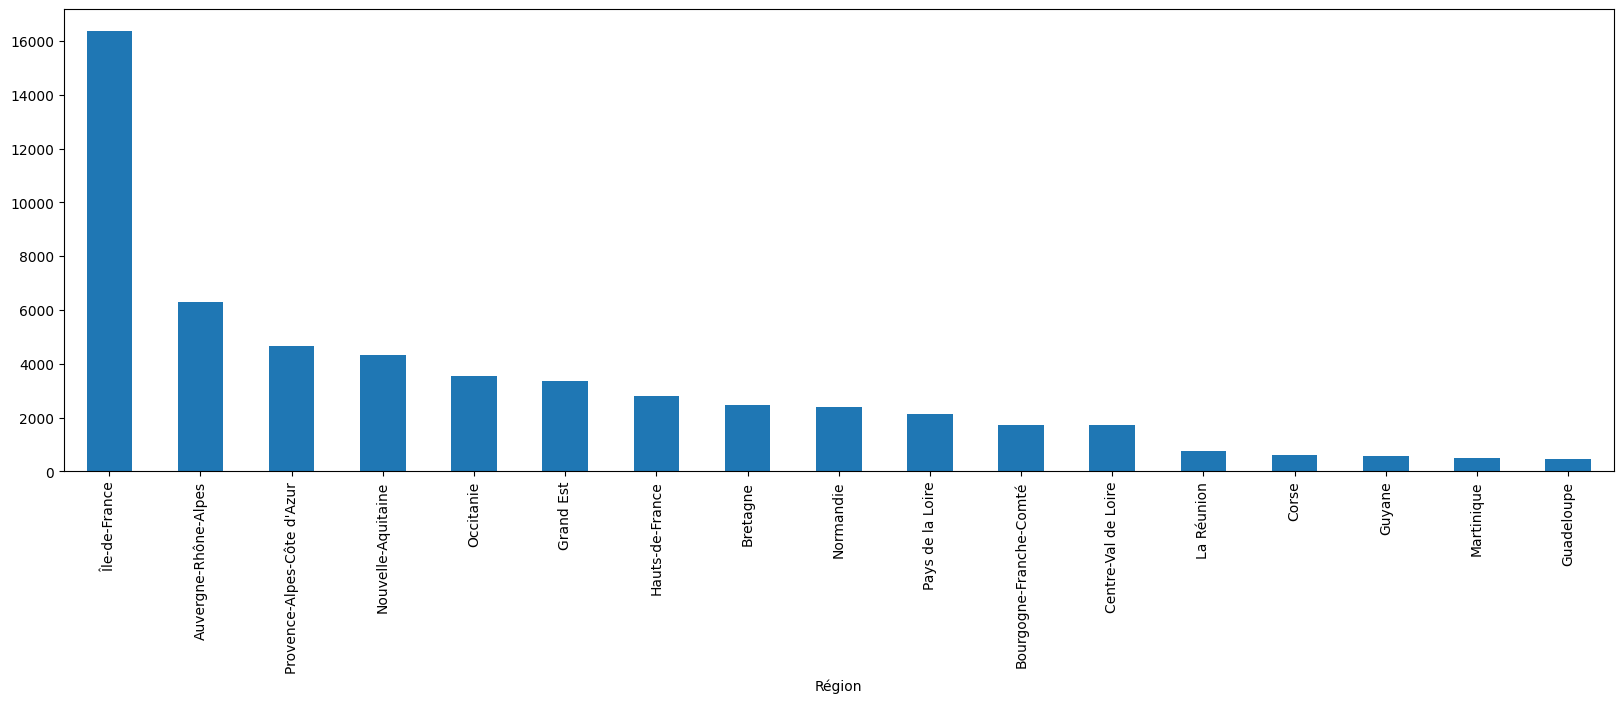

In [13]:
plt.figure(figsize=(20,6))
carac_df["Région"].value_counts().plot(kind='bar')

In [14]:
carac_df = carac_df[carac_df["VitesseMax"] <= 150]
carac_df = carac_df[carac_df["VitesseMax"] >= 50]
carac_df = carac_df[carac_df["Latitude"] >= 41]
carac_df = carac_df[carac_df["Longitude"] >= -5]

In [15]:
def f(carac_df):
    if (carac_df["Mois"] == 4 or carac_df["Mois"] == 5):
        val = "Printemps"
    elif (carac_df["Jour"] >= 20 and carac_df["Mois"] == 3) or (carac_df["Jour"] <= 21 and carac_df["Mois"] == 6):
        val = "Printemps"
    elif (carac_df["Mois"] == 7 or carac_df["Mois"] == 8):
        val = "Ete"
    elif (carac_df["Jour"] >= 21 and carac_df["Mois"] == 6) or (carac_df["Jour"] <= 23 and carac_df["Mois"] == 9):
        val = "Ete"
    elif (carac_df["Mois"] == 10 or carac_df["Mois"] == 11):
        val = "Automne"
    elif (carac_df["Jour"] >= 23 and carac_df["Mois"] == 9) or (carac_df["Jour"] <= 21 and carac_df["Mois"] == 12):
        val = "Automne"
    else:
        val = "Hiver"
    return val

In [16]:
carac_df["Saison"] = carac_df.apply(f, axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

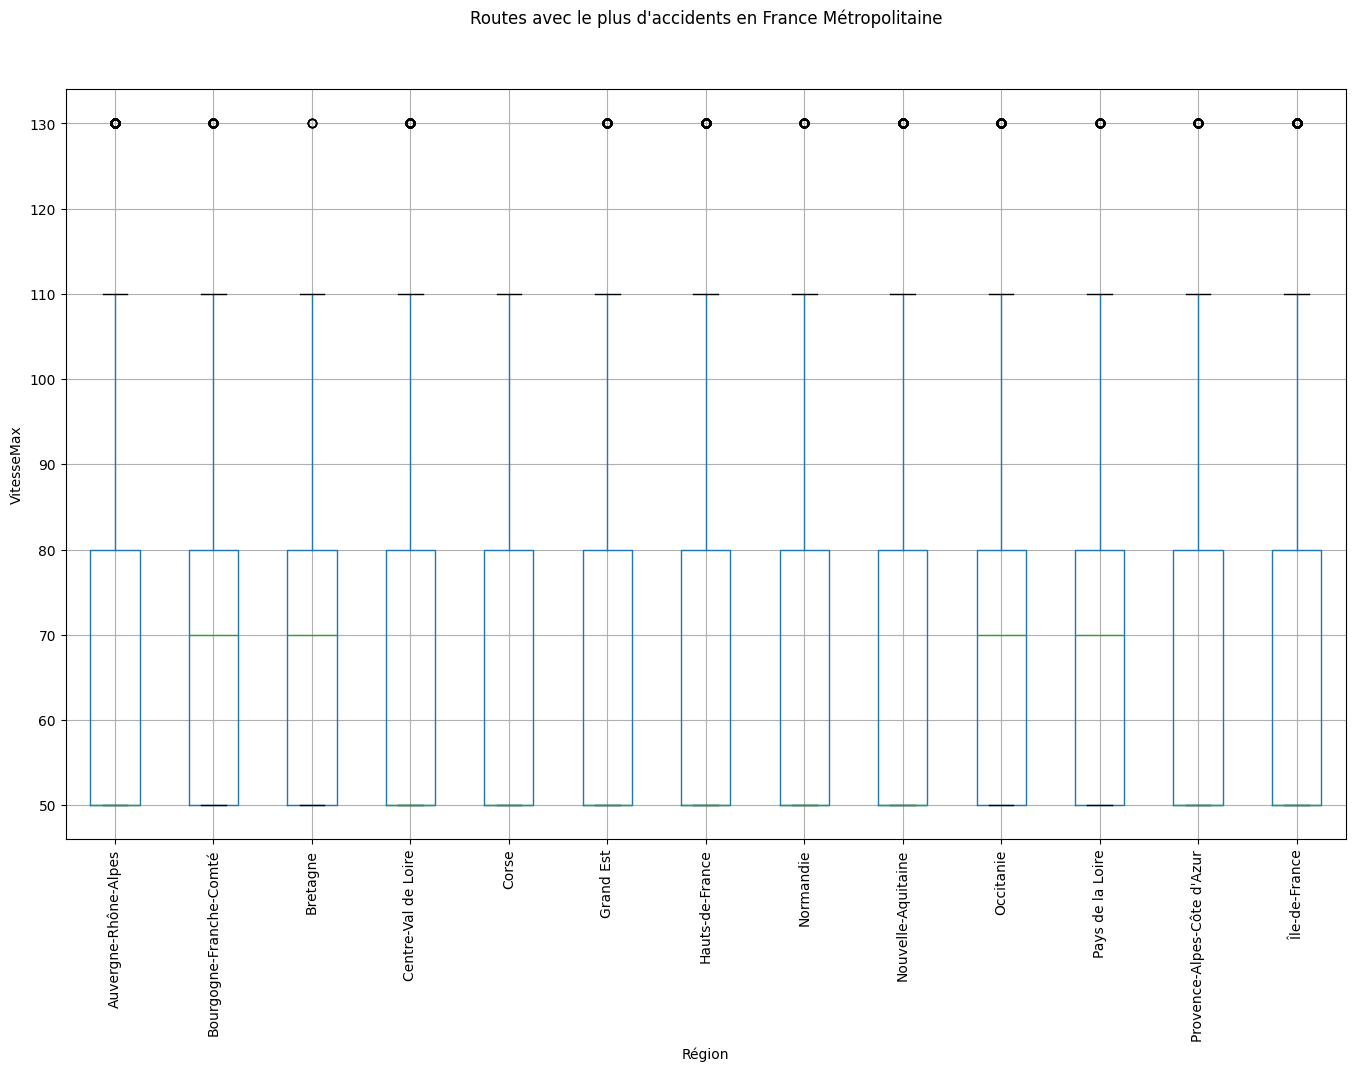

In [17]:
fig, ax = plt.subplots(1,1, figsize=(16,10))
carac_df.boxplot("VitesseMax","Région", ax=ax)
plt.suptitle("Routes avec le plus d'accidents en France Métropolitaine")
plt.title("")
plt.ylabel("VitesseMax")
plt.xticks(rotation=90)
plt.show

In [18]:
df = carac_df

In [19]:
label_encoder_region = LabelEncoder()
label_encoder_saison = LabelEncoder()

In [20]:
df['Région_encoded'] = label_encoder_region.fit_transform(df['Région'])
df['Saison_encoded'] = label_encoder_saison.fit_transform(df['Saison'])

In [21]:
features = ['Région_encoded', 'Saison_encoded']
targets = ['Latitude', 'Longitude']

In [22]:
X = df[features]
y = df[targets]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Entraîner un modèle de régression linéaire pour la latitude
model_latitude = LinearRegression()
model_latitude.fit(X_train, y_train['Latitude'])

LinearRegression()

In [25]:
# Entraîner un modèle de régression linéaire pour la longitude
model_longitude = LinearRegression()
model_longitude.fit(X_train, y_train['Longitude'])

LinearRegression()

In [26]:
# Faire des prédictions sur l'ensemble de test
predictions_latitude = model_latitude.predict(X_test)
predictions_longitude = model_longitude.predict(X_test)

In [27]:
df_test = df.loc[X_test.index].copy()
df_test['Prédiction_Latitude'] = predictions_latitude
df_test['Prédiction_Longitude'] = predictions_longitude

In [28]:
print(df_test[['Région', 'Saison', 'Latitude', 'Longitude', 'Prédiction_Latitude', 'Prédiction_Longitude']])

                           Région     Saison   Latitude  Longitude  \
55018                    Bretagne  Printemps  47.749550  -3.323090   
13460                    Bretagne      Hiver  47.991260  -4.073570   
459                     Grand Est  Printemps  49.335994   5.549077   
17095  Provence-Alpes-Côte d'Azur      Hiver  43.954070   4.858312   
16882     Bourgogne-Franche-Comté  Printemps  47.852347   3.597705   
...                           ...        ...        ...        ...   
27568                   Normandie  Printemps  49.100950   1.450840   
4064   Provence-Alpes-Côte d'Azur  Printemps  43.381820   5.225860   
50580          Nouvelle-Aquitaine    Automne  43.466656  -1.289220   
45211             Hauts-de-France  Printemps  49.591372   2.774895   
3758                Île-de-France    Automne  48.865000   2.677000   

       Prédiction_Latitude  Prédiction_Longitude  
55018            46.722256              3.245092  
13460            46.709371              3.180834  
459   

In [31]:
data_set = pd.DataFrame(df)
data_set.to_csv("Accident.csv")

In [35]:
def afficher_predictions_sur_carte(df, coordonnees_col, prediction_lat_col, prediction_lon_col):
    # Créer une carte centrée sur la première coordonnée de la liste
    carte = folium.Map(location=df[coordonnees_col].iloc[0], zoom_start=10)

    # Ajouter des marqueurs pour chaque coordonnée avec une couleur différente en fonction des prédictions
    for _, row in df.iterrows():
        folium.CircleMarker(location=row[coordonnees_col],
                        radius=2,
                        popup=f"Latitude: {row[prediction_lat_col]:.6f}, Longitude: {row[prediction_lon_col]:.6f}",
                      icon=folium.Icon(color='blue')).add_to(carte)